In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import numpy as np

In [5]:
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

In [6]:
data = pd.read_csv('default of credit card clients.csv',sep=';')

In [7]:
names = data.columns.values[:]

In [8]:
data['SEX'] = ''
data['MARRIAGE'] = ''
data['EDUCATION'] = ''

In [9]:
sex_word = ['male', 'female']
marriage_word = ['married', 'single', 'others']
education_word = ['graduate school', 'university', 'high school', 'others']

In [10]:
data

,ID,LIMIT_BAL,SEX1,EDUCATION1,MARRIAGE1,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SEX,MARRIAGE,EDUCATION
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,,,
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,,,
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,,,
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,,,
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,,,
5,6,50000,1,1,2,37,0,0,0,0,...,2500,1815,657,1000,1000,800,0,,,
6,7,500000,1,1,2,29,0,0,0,0,...,55000,40000,38000,20239,13750,13770,0,,,
7,8,100000,2,2,2,23,0,-1,-1,0,...,380,601,0,581,1687,1542,0,,,
8,9,140000,2,3,1,28,0,0,2,0,...,3329,0,432,1000,1000,1000,0,,,
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,0,0,13007,1122,0,0,,,


In [11]:
for i in range(len(data)):
    data.set_value(i, 'SEX', sex_word[data['SEX1'][i]-1])
    if data['MARRIAGE1'][i] > 0:
        data.set_value(i, 'MARRIAGE', marriage_word[data['MARRIAGE1'][i]-1])
    else:
        data.set_value(i,'MARRIAGE', marriage_word[2])
    if data['EDUCATION1'][i]>0 and data['EDUCATION1'][i]<4:
        data.set_value(i, "EDUCATION", education_word[data['EDUCATION1'][i]-1])
    else:
        data.set_value(i, "EDUCATION", education_word[3])

In [12]:
data['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4917
others               468
dtype: int64

([<matplotlib.patches.Wedge at 0x113098850>,
  <matplotlib.text.Text at 0x1130de190>])

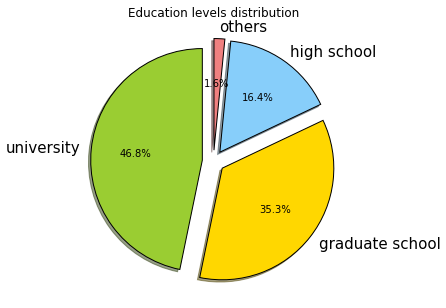

In [13]:
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0.1, 0.1, 0.1)
plt.figure(figsize=(5,5))
plt.title('Education levels distribution')
plt.pie(data['EDUCATION'].value_counts(), explode=explode, labels=['university', 'graduate school', 'high school', 'others'], colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

In [14]:
data['MARRIAGE'].value_counts()

single     15964
married    13659
others       377
dtype: int64

([<matplotlib.patches.Wedge at 0x113bea510>,
  <matplotlib.text.Text at 0x113c04dd0>])

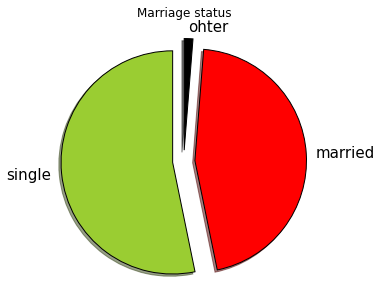

In [15]:
colors = ['yellowgreen', 'red', 'k', 'lightcoral']
explode = (0.1, 0.1, 0.1)
plt.figure(figsize=(5,5))
plt.title('Marriage status')
plt.pie(data['MARRIAGE'].value_counts(), explode=explode, labels=['single', 'married', 'ohter'], colors=colors, shadow=True, startangle=90)

In [16]:
data['SEX'].value_counts()

female    18112
male      11888
dtype: int64

([<matplotlib.patches.Wedge at 0x113d03d10>,
  <matplotlib.text.Text at 0x113d1d750>])

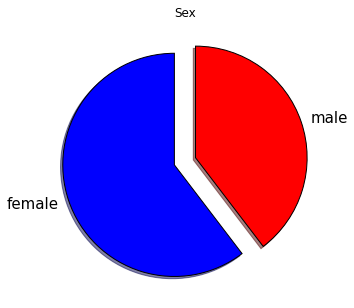

In [17]:
colors = ['b', 'red']
explode = (0.1, 0.1)
plt.figure(figsize=(5,5))
plt.title('Sex')
plt.pie(data['SEX'].value_counts(), explode=explode, labels=['female','male'], colors=colors, shadow=True, startangle=90)

So we see that mostly credit card owners are female.

In [18]:
len(data)

30000

In [20]:
np.median(data[data['SEX1']==1]['LIMIT_BAL'])

130000.0

In [22]:
np.median(data[data['SEX1']==2]['LIMIT_BAL'])

150000.0

Group Age < 30

In [23]:
df = data[data['AGE']<30]

In [24]:
df['default'].value_counts(sort=False)

0    7421
1    2197
dtype: int64

In [25]:
len(range(21,80))

59

In [26]:
idx = 0;
def_rates_age = np.zeros((59,))
def_count_age = np.zeros((59,))
def_count_age_m = np.zeros((59,))
def_count_age_f = np.zeros((59,))
def_avg_amount_age = np.zeros((59,))
for age in range(21,80):
    df = data[data['AGE'] == age]
    df1 = df[df['SEX']=='male']
    def_count_age[idx] = len(df)
    def_count_age_m[idx] = len(df1)
    def_count_age_f[idx] = def_count_age[idx] - def_count_age_m[idx]
    if len(df)>0:
        def_avg_amount_age[idx] = np.mean(df['LIMIT_BAL'])
    if len(df['default'].value_counts(sort=False))>1:
        def_rates_age[idx] = float(df['default'].value_counts(sort=False)[1])/(df['default'].value_counts(sort=False)[1]+df['default'].value_counts(sort=False)[0])
        #print float(df['default'].value_counts(sort=False)[1])/(df['default'].value_counts(sort=False)[1]+df['default'].value_counts(sort=False)[0])
    else:
        def_rates_age[idx] = 0
        #print 0
    idx = idx + 1  

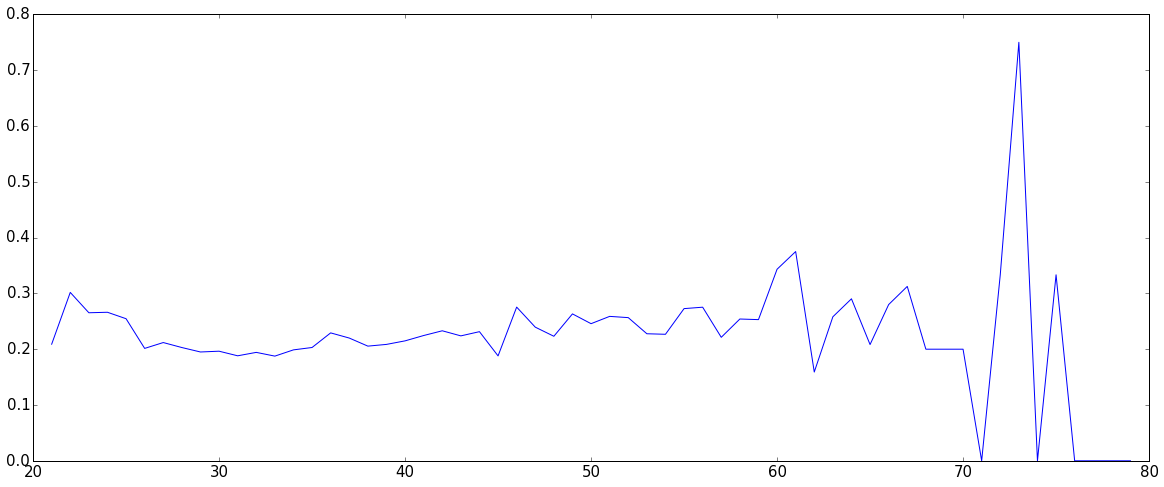

In [27]:
plt.figure(figsize = (20,8))
plt.plot(range(21,80), def_rates_age)

<Container object of 59 artists>

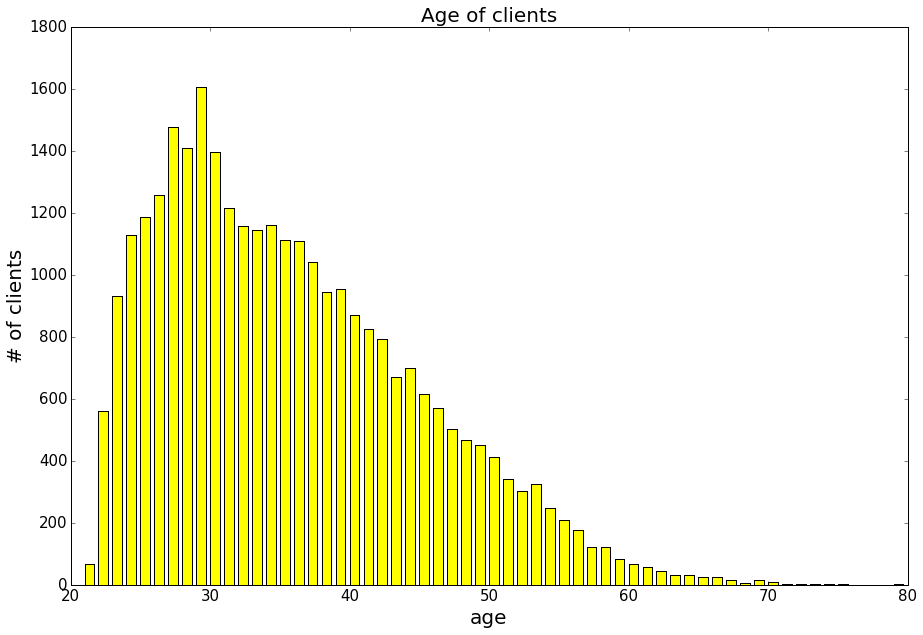

In [28]:
plt.figure(figsize=(15,10))
plt.title('Age of clients', fontsize=20)
plt.ylabel('# of clients', fontsize=20)
plt.xlabel('age', fontsize=20)
plt.bar(range(21,80), def_count_age, 0.7, color='yellow')

In [29]:
df1 = data[data['SEX']=='male']
print np.median(df1['AGE'])
df1 = data[data['SEX']=='female']
print np.median(df1['AGE'])

35.0
33.0


<Container object of 59 artists>

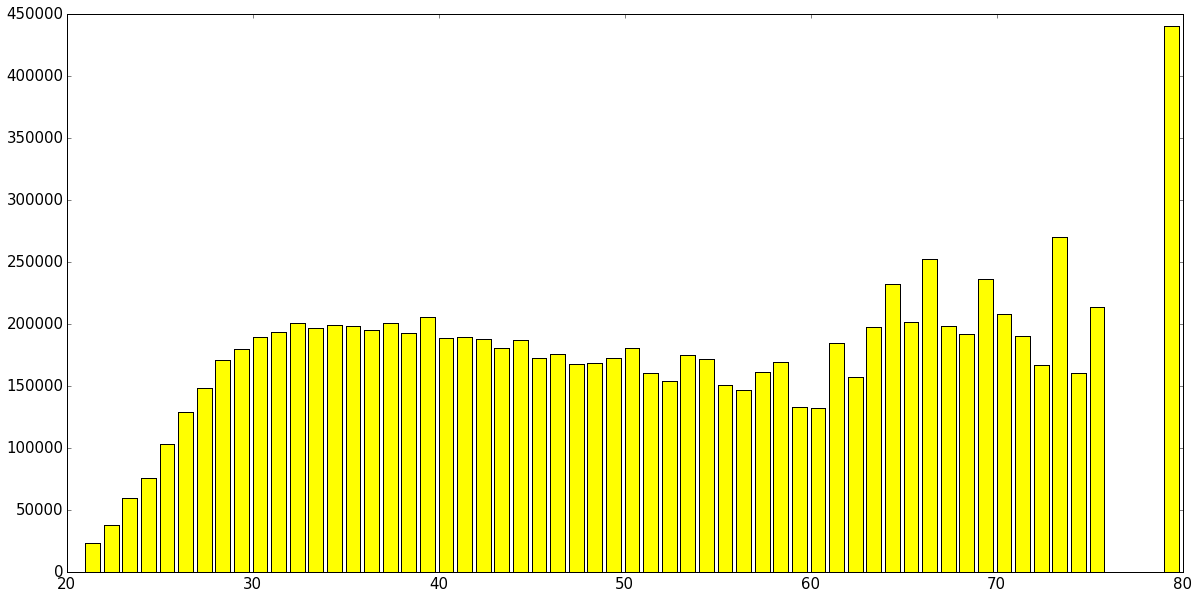

In [30]:
plt.figure(figsize=(20,10))
plt.bar(range(21,80), def_avg_amount_age, color='yellow')

#Providing group 65+

In [31]:
idx = 0;
def_rates_age_upd = np.zeros((50,))
def_count_age_upd = np.zeros((50,))
def_avg_amount_age_upd = np.zeros((50,))
for age in range(21,70):
    df = data[data['AGE'] == age]
    def_count_age_upd[idx] = len(df)
    if len(df)>0:
        def_avg_amount_age_upd[idx] = np.mean(df['LIMIT_BAL'])
    if len(df['default'].value_counts(sort=False))>1:
        def_rates_age_upd[idx] = float(df['default'].value_counts(sort=False)[1])/(df['default'].value_counts(sort=False)[1]+df['default'].value_counts(sort=False)[0])
    else:
        def_rates_age_upd[idx] = 0
        #print 0
    idx = idx + 1  
age = 70
df = data[data['AGE'] >= age]
def_count_age_upd[idx] = len(df)
def_avg_amount_age_upd[idx] = np.mean(df['LIMIT_BAL'])
if len(df['default'].value_counts(sort=False))>1:
    def_rates_age_upd[idx] = float(df['default'].value_counts(sort=False)[1])/(df['default'].value_counts(sort=False)[1]+df['default'].value_counts(sort=False)[0])
else:
    def_rates_age_upd[idx] = 0

<Container object of 50 artists>

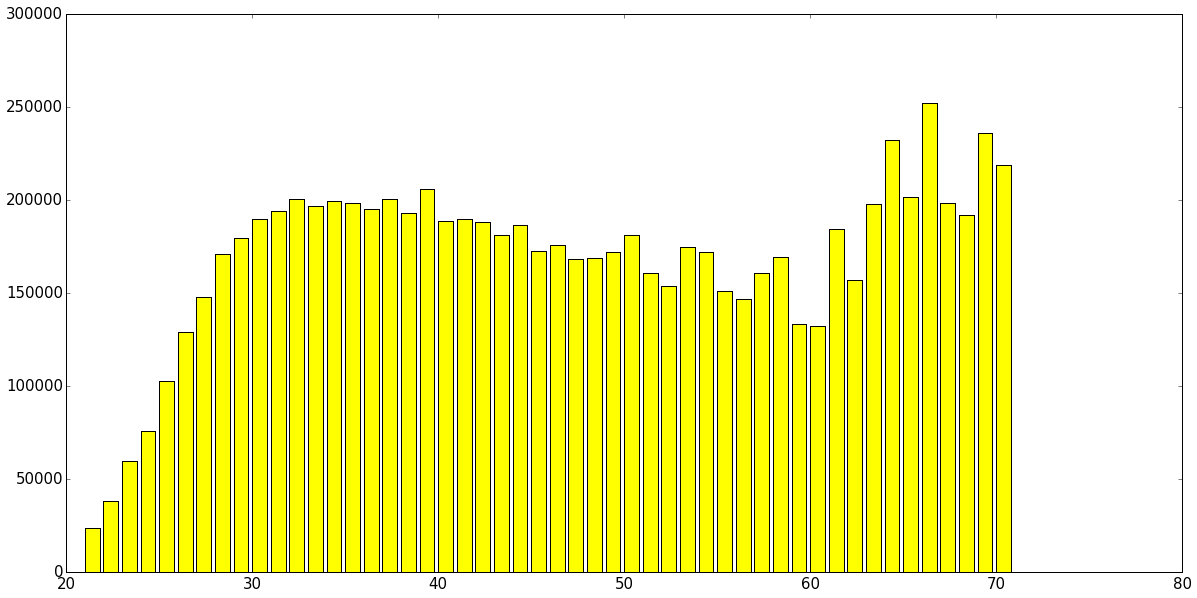

In [32]:
plt.figure(figsize=(20,10))
plt.bar(range(21,71), def_avg_amount_age_upd, color='yellow')

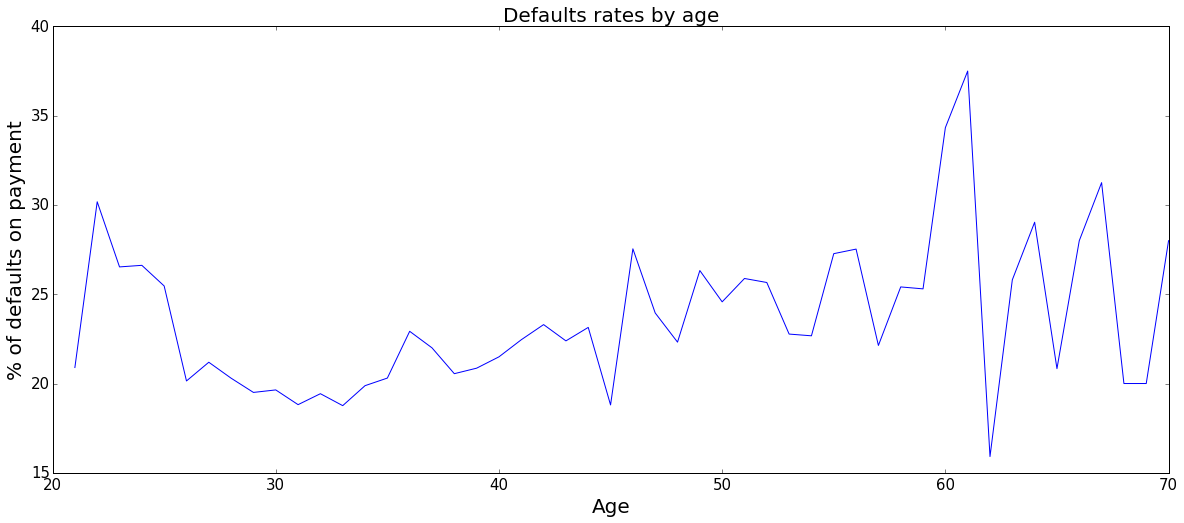

In [33]:
plt.figure(figsize = (20,8))
plt.xlabel('Age', fontsize=20)
plt.ylabel('% of defaults on payment', fontsize=20)
plt.title('Defaults rates by age', fontsize=20)
plt.plot(range(21,71), 100*def_rates_age_upd)

Default ratio by sex

In [34]:
df2 = data[data['SEX']=='male']
print float(df2['default'].value_counts()[1])/sum(df2['default'].value_counts())
df2 = data[data['SEX']=='female']
print float(df2['default'].value_counts()[1])/sum(df2['default'].value_counts())
print float(data['default'].value_counts()[1])/sum(data['default'].value_counts())

0.241672274563
0.207762809187
0.2212


Default ratio by education level

In [35]:
df2 = data[data['EDUCATION']=='high school']
print float(df2['default'].value_counts()[1])/sum(df2['default'].value_counts())
df2 = data[data['EDUCATION']=='university']
print float(df2['default'].value_counts()[1])/sum(df2['default'].value_counts())
df2 = data[data['EDUCATION']=='graduate school']
print float(df2['default'].value_counts()[1])/sum(df2['default'].value_counts())
df2 = data[data['EDUCATION']=='others']
print float(df2['default'].value_counts()[1])/sum(df2['default'].value_counts())
print float(data['default'].value_counts()[1])/sum(data['default'].value_counts())

0.251576164328
0.237348538845
0.192347661786
0.0705128205128
0.2212


<Container object of 50 artists>

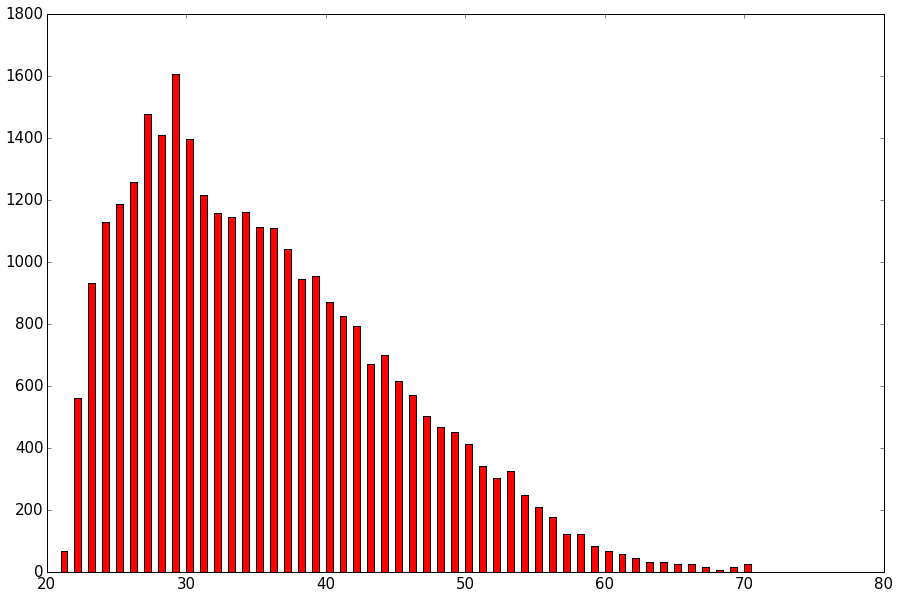

In [36]:
plt.figure(figsize=(15,10))
plt.bar(range(21,71), def_count_age_upd, 0.5, color='red')

# Who is to fail payments?

In [37]:
vals = data[data['SEX']=='male']['default'].value_counts()
print sum(vals), float(vals[1])/sum(vals) 

11888 0.241672274563


In [38]:
vals = data[data['SEX']=='female']['default'].value_counts()
print sum(vals), float(vals[1])/sum(vals) 

18112 0.207762809187


In [39]:
vals = data[data['MARRIAGE']=='single']['default'].value_counts()
print sum(vals), float(vals[1])/sum(vals) 

15964 0.209283387622


In [40]:
vals = data[data['MARRIAGE']=='married']['default'].value_counts()
print sum(vals), float(vals[1])/sum(vals) 

13659 0.234717036386


In [41]:
vals = data[data['EDUCATION']=='graduate school']['default'].value_counts()
print sum(vals), float(vals[1])/sum(vals) 

10585 0.192347661786


In [42]:
vals = data[data['EDUCATION']=='university']['default'].value_counts()
print sum(vals), float(vals[1])/sum(vals) 

14030 0.237348538845


In [43]:
vals = data[data['EDUCATION']=='high school']['default'].value_counts()
print sum(vals), float(vals[1])/sum(vals) 

4917 0.251576164328


In [44]:
data['late_payments'] = 0
data['total_payments'] = 0
data['consecutive_late_payments'] = 0

In [45]:
df = data[data['SEX']=='female']
df = df[df['MARRIAGE']=='single']
df = df[df['EDUCATION']=='graduate school']
vals = df['default'].value_counts()
print sum(vals), float(vals[1])/sum(vals) 

4176 0.179118773946


In [46]:
stats = pd.DataFrame(columns=['SEX', 'MARRIAGE', 'EDUCATION', 'AGE', '#', 'RATE', 'LIMIT_BAL_AVG', 'LIMIT_BAL_MED'])

In [47]:
min_rate = 1
idx = 0
for sex in sex_word:
    for marriage in marriage_word[:-1]:
        for education in education_word[:-1]:
            for age in range(21,80,5):
                df = data[data['SEX']==sex]
                df = df[df['MARRIAGE']==marriage]
                df = df[df['EDUCATION']==education]
                df = df[df['AGE']>=age]
                df = df[df['AGE']<=age+5]
                vals = df['default'].value_counts()
                if sum(vals)>250:
                    #print sex, age, marriage, education
                    #print sum(vals)
                    if len(vals)>1:
                        rate = float(vals[1])/sum(vals)
                    else:
                        rate = 0
                    stats.set_value(idx, 'SEX', sex)
                    stats.set_value(idx, 'MARRIAGE', marriage)
                    stats.set_value(idx, 'EDUCATION', education)
                    stats.set_value(idx, 'AGE', str(age)+'-'+str(age+4))
                    stats.set_value(idx, '#', sum(vals))
                    stats.set_value(idx, 'RATE', rate)
                    stats.set_value(idx, 'LIMIT_BAL_AVG', np.mean(df['LIMIT_BAL']))
                    stats.set_value(idx, 'LIMIT_BAL_MED', np.median(df['LIMIT_BAL']))
                    idx = idx + 1

In [48]:
stats

,SEX,MARRIAGE,EDUCATION,AGE,#,RATE,LIMIT_BAL_AVG,LIMIT_BAL_MED
0,male,married,graduate school,31-35,321,0.2211838,251277.3,230000
1,male,married,graduate school,36-40,547,0.2285192,260457,240000
2,male,married,graduate school,41-45,449,0.2227171,272227.2,240000
3,male,married,graduate school,46-50,300,0.2433333,267433.3,250000
4,male,married,university,26-30,300,0.26,142966.7,110000
5,male,married,university,31-35,569,0.254833,164235.5,150000
6,male,married,university,36-40,694,0.2737752,172507.2,150000
7,male,married,university,41-45,515,0.2679612,164368.9,130000
8,male,married,university,46-50,373,0.2922252,168471.8,120000
9,male,married,high school,41-45,265,0.2716981,135283,90000


In [49]:
stats.sort(columns='RATE')

,SEX,MARRIAGE,EDUCATION,AGE,#,RATE,LIMIT_BAL_AVG,LIMIT_BAL_MED
34,female,single,graduate school,26-30,2110,0.1616114,197654,180000
35,female,single,graduate school,31-35,1005,0.1631841,243542.3,220000
18,female,married,graduate school,26-30,268,0.1641791,215037.3,200000
11,male,single,graduate school,26-30,1254,0.1722488,183843.7,160000
21,female,married,graduate school,41-45,423,0.1725768,257352.2,240000
19,female,married,graduate school,31-35,630,0.1730159,246777.8,230000
20,female,married,graduate school,36-40,690,0.173913,252637.7,230000
39,female,single,university,31-35,786,0.178117,192175.6,180000
36,female,single,graduate school,36-40,388,0.185567,261649.5,230000
40,female,single,university,36-40,458,0.1855895,192794.8,170000


In [50]:
float(2210)/30000*100

7.366666666666667

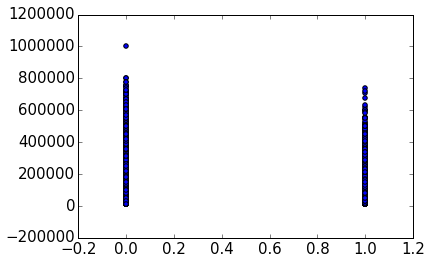

In [51]:
plt.scatter(data['default'], data['LIMIT_BAL'])

#Credit Limits

In [52]:
print "min", min(data['LIMIT_BAL'])
print "max", max(data['LIMIT_BAL'])
print "average", np.mean(data['LIMIT_BAL'])
print "median", np.median(data['LIMIT_BAL'])

min 10000
max 1000000
average 167484.322667
median 140000.0


In [53]:
stats.sort(columns='LIMIT_BAL_AVG')

,SEX,MARRIAGE,EDUCATION,AGE,#,RATE,LIMIT_BAL_AVG,LIMIT_BAL_MED
14,male,single,university,21-25,870,0.291954,64218.39,50000
22,female,married,university,21-25,365,0.290411,85123.29,60000
10,male,single,graduate school,21-25,434,0.2142857,85668.2,50000
37,female,single,university,21-25,1586,0.2522068,95416.14,70000
33,female,single,graduate school,21-25,1102,0.2050817,102350.3,70000
32,female,married,high school,51-55,252,0.2261905,113055.6,80000
31,female,married,high school,46-50,341,0.2961877,123020.5,80000
17,male,single,university,36-40,392,0.2729592,126709.2,90000
28,female,married,high school,31-35,284,0.2429577,132147.9,100000
15,male,single,university,26-30,1120,0.2276786,133660.7,100000


In [54]:
stats.sort(columns='LIMIT_BAL_MED')

,SEX,MARRIAGE,EDUCATION,AGE,#,RATE,LIMIT_BAL_AVG,LIMIT_BAL_MED
10,male,single,graduate school,21-25,434,0.2142857,85668.2,50000
14,male,single,university,21-25,870,0.291954,64218.39,50000
22,female,married,university,21-25,365,0.290411,85123.29,60000
33,female,single,graduate school,21-25,1102,0.2050817,102350.3,70000
37,female,single,university,21-25,1586,0.2522068,95416.14,70000
31,female,married,high school,46-50,341,0.2961877,123020.5,80000
32,female,married,high school,51-55,252,0.2261905,113055.6,80000
17,male,single,university,36-40,392,0.2729592,126709.2,90000
9,male,married,high school,41-45,265,0.2716981,135283,90000
28,female,married,high school,31-35,284,0.2429577,132147.9,100000


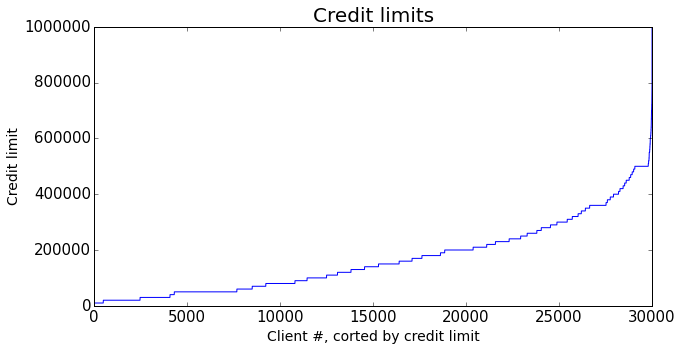

In [55]:
plt.figure(figsize=(10,5))
plt.plot(data.sort(columns='LIMIT_BAL')['LIMIT_BAL'])
plt.xlabel('Client #, corted by credit limit', fontsize=14)
plt.ylabel('Credit limit', fontsize=14)
plt.title('Credit limits', fontsize=20)

In [56]:
data['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
150000     1110
100000     1048
180000      995
360000      881
60000       825
140000      749
230000      737
70000       731
210000      730
130000      729
120000      726
500000      722
160000      694
90000       651
240000      619
110000      588
300000      554
170000      532
260000      521
280000      493
10000       493
220000      469
250000      350
290000      348
320000      312
           ... 
520000       20
510000       19
600000       16
580000       11
610000       11
530000       10
560000       10
620000        9
700000        8
570000        8
630000        7
640000        7
540000        6
590000        6
710000        6
680000        4
750000        4
650000        3
670000        3
720000        3
660000        3
16000         2
780000        2
740000        2
730000        2
800000        2
760000        1
690000        1
1000000       1
327680        1
dtype: int64

In [57]:
data

,ID,LIMIT_BAL,SEX1,EDUCATION1,MARRIAGE1,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SEX,MARRIAGE,EDUCATION,late_payments,total_payments,consecutive_late_payments
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,female,married,university,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,female,single,university,0,0,0
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,female,single,university,0,0,0
3,4,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,female,married,university,0,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,male,married,university,0,0,0
5,6,50000,1,1,2,37,0,0,0,0,...,1000,1000,800,0,male,single,graduate school,0,0,0
6,7,500000,1,1,2,29,0,0,0,0,...,20239,13750,13770,0,male,single,graduate school,0,0,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,581,1687,1542,0,female,single,university,0,0,0
8,9,140000,2,3,1,28,0,0,2,0,...,1000,1000,1000,0,female,married,high school,0,0,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,13007,1122,0,0,male,single,high school,0,0,0


In [58]:
def_rates_am = np.zeros((len(range(1,12)),))
counts_am = np.zeros((len(range(1,12)),))
idx = 0
names = []
for am in range(1,11):
    df = data[data['LIMIT_BAL'] <= am*50000]
    df = df[df['LIMIT_BAL'] > (am-1)*50000]
    names = names + [str((am-1)*50) + 'k-' + str(am*50) + 'k']
    vals = df['default'].value_counts(sort=False)
    print (am-1)*50000, '-', am*50000
    print len(df)
    counts_am[idx] = len(df)
    if len(vals)>1:
        def_rates_am[idx] = float(vals[1])/sum(vals)
    else:
        def_rates_am[idx] = 0
    idx = idx + 1
df = data[data['LIMIT_BAL']>=500000]
vals = df['default'].value_counts(sort=False)
names = names + ['500k+']
counts_am[idx] = len(df)
if len(vals)>1:
    def_rates_am[idx] = float(vals[1])/sum(vals)
else:
    def_rates_am[idx] = 0

0 - 50000
7676
50000 - 100000
4822
100000 - 150000
3902
150000 - 200000
3978
200000 - 250000
2905
250000 - 300000
2154
300000 - 350000
1206
350000 - 400000
1553
400000 - 450000
573
450000 - 500000
1025


In [59]:
names

['0k-50k',
 '50k-100k',
 '100k-150k',
 '150k-200k',
 '200k-250k',
 '250k-300k',
 '300k-350k',
 '350k-400k',
 '400k-450k',
 '450k-500k',
 '500k+']

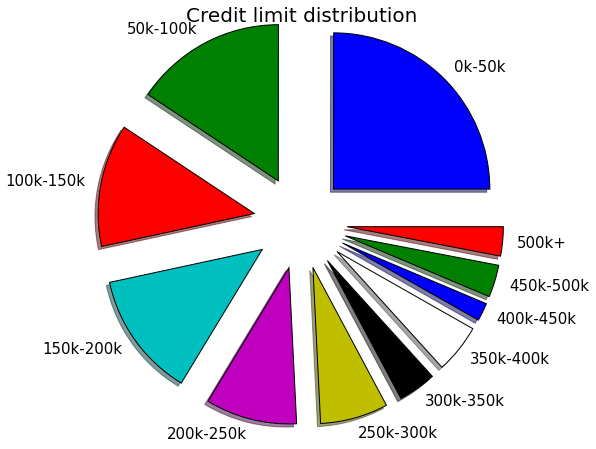

In [60]:
plt.figure(figsize=(7,7))
plt.pie(counts_am, explode=(0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3), labels=names, shadow=True)
plt.title('Credit limit distribution', fontsize=20)

[1, 12, 0, 0.35]

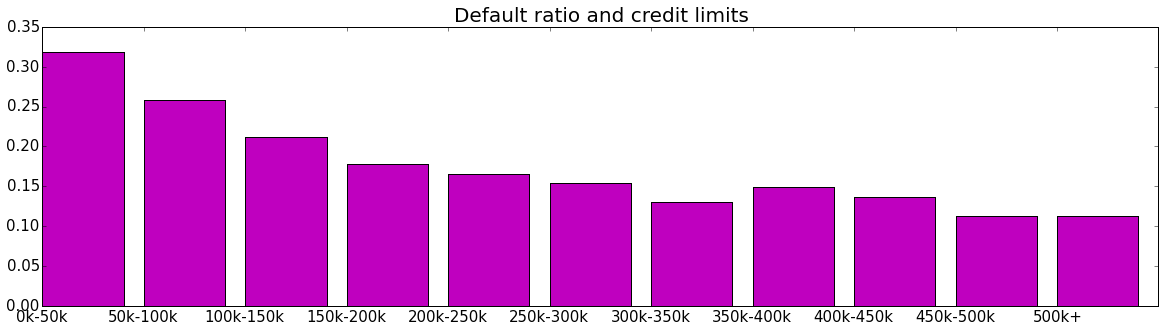

In [61]:
plt.figure(figsize=(20,5))
plt.bar(range(1,12),def_rates_am, color='m')
plt.xticks(range(1,21), names)
plt.title('Default ratio and credit limits', fontsize=20)
plt.axis([1,12,0,0.35])